## K-means in action

### Motivation
- Load database
- Evaluation of the number of clusters
- K-means train
- Apply K-means in new data
- Evaluation of results
- K-means vs. Logistic Regression
- Ensemble model: K-means PLUS Logistic Regression
- Ensemble model: K-means WITH Logistic Regression

In [83]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

%matplotlib inline

------------------------

### Load database

In [6]:
# change working directory
import os
os.getcwd() # no need to change it

articles = pd.read_csv("SportsArticles.csv", sep = ";")
articles.shape

(1000, 62)

In [7]:
articles.columns

Index(['TextID', 'URL', 'Label', 'totalWordsCount', 'semanticobjscore',
       'semanticsubjscore', 'CC', 'CD', 'DT', 'EX', 'FW', 'INs', 'JJ', 'JJR',
       'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP',
       'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TOs', 'UH', 'VB', 'VBD',
       'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'baseform',
       'Quotes', 'questionmarks', 'exclamationmarks', 'fullstops', 'commas',
       'semicolon', 'colon', 'ellipsis', 'pronouns1st', 'pronouns2nd',
       'pronouns3rd', 'compsupadjadv', 'past', 'imperative', 'present3rd',
       'present1st2nd', 'sentence1st', 'sentencelast', 'txtcomplexity'],
      dtype='object')

In [8]:
articles[0:3]

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,objective,109,0,1,7,9,0,5,...,0,3,0,11,0,0,0,0,1,18
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,objective,309,21,4,1,19,1,4,...,0,10,0,13,0,14,9,1,1,14
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,objective,149,6,1,8,14,0,5,...,0,2,0,8,0,3,2,1,1,18


In [9]:
# adjusting the variable "Label"
articles["Label"] = np.where(articles["Label"] == "objective", 1, 0)

In [10]:
# inspectioning "Label" - just want the count and mean
articles["Label"].describe()[['count', 'mean']]

count    1000.000
mean        0.635
Name: Label, dtype: float64

##### It means that 63.5% of my observations are "objective". We have a dataset that is a little bit unbalanced. Database equalization techniques could be good here (in a professional context)

In [11]:
# splitting the data into x and y variables
x = articles.drop(["TextID", "URL", "Label"], axis = 1) # TextID and URL does not matter here
y = articles["Label"]

# splitting it between training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

-------------------------------

### Evaluation of the number of clusters

In [12]:
min_clusters = 2
max_clusters = 20
inertias = np.zeros(shape = (max_clusters - min_clusters + 1,))

In [15]:
for i in range(min_clusters, max_clusters + 1):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(x_train)
    inertias[i - min_clusters] = km.inertia_

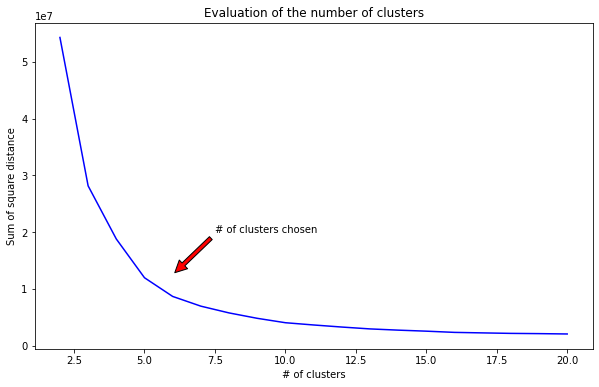

In [16]:
plt.figure(figsize = (10, 6))
plt.plot(range(min_clusters, max_clusters + 1), inertias, color = "b")
plt.title("Evaluation of the number of clusters")
plt.xlabel("# of clusters")
plt.ylabel("Sum of square distance")
plt.annotate("# of clusters chosen", xy = (6, 1.25e7), xytext = (7.5, 2e7),
            arrowprops = dict(facecolor = "red", shrink = 0.05),);

------------------------------

### K-Means train

In [17]:
kmodel = KMeans(n_clusters = 6, random_state = 42)
clusters = kmodel.fit(x_train)

In [18]:
clusters.inertia_

8674616.308730168

In [20]:
clusters.labels_

array([4, 1, 1, 4, 4, 1, 4, 2, 2, 4, 1, 3, 4, 1, 3, 3, 3, 0, 4, 1, 0, 1,
       1, 1, 1, 1, 4, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 0, 4, 1, 1, 0, 4,
       1, 3, 4, 4, 1, 4, 3, 3, 4, 4, 4, 3, 1, 3, 3, 1, 1, 4, 4, 0, 4, 3,
       5, 4, 1, 0, 1, 4, 3, 1, 3, 3, 3, 3, 1, 4, 3, 4, 3, 0, 4, 3, 1, 3,
       1, 3, 4, 4, 5, 0, 0, 5, 3, 5, 3, 4, 1, 1, 3, 1, 1, 4, 4, 3, 3, 1,
       3, 1, 1, 0, 4, 4, 4, 1, 5, 1, 4, 1, 4, 3, 1, 4, 1, 4, 4, 1, 3, 3,
       3, 4, 5, 1, 4, 0, 1, 3, 3, 3, 3, 0, 1, 1, 5, 0, 0, 0, 3, 4, 4, 3,
       4, 1, 0, 4, 1, 4, 1, 4, 1, 4, 1, 1, 4, 1, 4, 4, 1, 1, 0, 5, 1, 1,
       1, 1, 4, 1, 4, 0, 3, 4, 4, 1, 4, 0, 4, 1, 4, 1, 1, 4, 0, 1, 4, 4,
       3, 1, 5, 4, 0, 3, 4, 3, 1, 1, 4, 3, 0, 0, 4, 3, 4, 1, 1, 4, 1, 4,
       4, 4, 4, 1, 3, 3, 1, 1, 0, 3, 0, 4, 4, 1, 4, 4, 3, 1, 0, 1, 4, 4,
       4, 0, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 0, 3, 1, 1, 0, 1, 1, 3, 4, 3,
       4, 0, 1, 3, 1, 1, 4, 3, 4, 4, 1, 3, 5, 3, 1, 1, 1, 4, 1, 1, 1, 1,
       4, 4, 1, 4, 1, 4, 4, 0, 0, 3, 0, 4, 0, 0, 1,

----------------------------

### Apply K-Means in new data

In [22]:
# Apply it to the train and test data
train_clusters = pd.DataFrame(clusters.labels_, columns = ["Cluster"])
train_clusters["Label"] = y_train.values

fitted_clusters = kmodel.predict(x_test)
test_clusters = pd.DataFrame(fitted_clusters, columns = ["Cluster"])
test_clusters["Label"] = y_test.values

# we must use the .values to avoid index problems

In [23]:
train_clusters.head()

,Cluster,Label
0,4,0
1,1,1
2,1,1
3,4,0
4,4,0


In [24]:
test_clusters.head()

,Cluster,Label
0,1,1
1,3,0
2,3,0
3,3,0
4,3,1


In [25]:
pd.crosstab(train_clusters["Cluster"], train_clusters["Label"])

Label,0,1
Cluster,,
0,44,13
1,21,150
2,2,1
3,31,79
4,92,48
5,12,7


In [27]:
pd.crosstab(test_clusters["Cluster"], test_clusters["Label"])

Label,0,1
Cluster,,
0,24,19
1,12,180
2,5,1
3,40,84
4,69,45
5,13,8


In [28]:
train_clusters.describe()

,Cluster,Label
count,500.000000,500.000000
mean,2.324000,0.596000
std,1.542655,0.491189
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,1.000000
75%,4.000000,1.000000
max,5.000000,1.000000


In [29]:
train_clusters.groupby("Cluster").mean()

,Label
Cluster,
0,0.228070
1,0.877193
2,0.333333
3,0.718182
4,0.342857
5,0.368421


In [30]:
test_clusters.groupby("Cluster").mean()

,Label
Cluster,
0,0.441860
1,0.937500
2,0.166667
3,0.677419
4,0.394737
5,0.380952


##### the values are different from our previous mean of the dataset. It shows that the KMeans algo is working. There is a discriminatory characteristic in the algo

##### interesting points:
- If I am doing trade (finance), I can choose only to do trade when I am at a specific cluster/day
- If a credit client is in one really "good" cluster, I can save operational costs by trusting the model
- I also can use the KMeans as a filter, and then do specific analysis

In [32]:
test_clusters.groupby("Cluster")["Label"].describe()[['count', 'mean']]

,count,mean
Cluster,,
0,43.0,0.441860
1,192.0,0.937500
2,6.0,0.166667
3,124.0,0.677419
4,114.0,0.394737
5,21.0,0.380952


---------------------

### Evaluation of results

In [34]:
train_clusters["Predicted"] = np.where(((train_clusters["Cluster"] == 1) | (train_clusters["Cluster"] == 3)), 1, 0)
test_clusters["Predicted"] = np.where(((test_clusters["Cluster"] == 1) | (test_clusters["Cluster"] == 3)), 1, 0)

In [35]:
# Confusion matrix of training
pd.crosstab(train_clusters["Predicted"], train_clusters["Label"])

Label,0,1
Predicted,,
0,150,69
1,52,229


In [36]:
# Confusion matrix of test
pd.crosstab(test_clusters["Predicted"], test_clusters["Label"])

Label,0,1
Predicted,,
0,111,73
1,52,264


In [37]:
test_clusters.shape[0]

500

In [40]:
# Training accuracy
acc_train = (
    (pd.crosstab(train_clusters["Predicted"], train_clusters["Label"])[0][0]
    + pd.crosstab(train_clusters["Predicted"], train_clusters["Label"])[1][1])/train_clusters.shape[0]
)

In [41]:
# Test accuracy
acc_test = (
    (pd.crosstab(test_clusters["Predicted"], test_clusters["Label"])[0][0]
    + pd.crosstab(test_clusters["Predicted"], test_clusters["Label"])[1][1])/test_clusters.shape[0]
)

In [42]:
# Accuracy
print("Train accuracy: ", acc_train)
print("\n")
print("Test accuracy: ", acc_test)

Train accuracy:  0.758


Test accuracy:  0.75


--------------------------

### K-means vs. Logistic Regression

In [46]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

reg_log = sm.GLM(y_train, x_train, family = sm.families.Binomial());

reg_log = reg_log.fit()

print(reg_log.summary());

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Label   No. Observations:                  500
Model:                            GLM   Df Residuals:                      493
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -221.23
Date:                Sat, 04 Jun 2022   Deviance:                       442.46
Time:                        17:06:19   Pearson chi2:                 8.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8415      0.236      7.814

In [97]:
# Retraining it with only significant variables
x_train_ = sm.add_constant(x_train[["CD", "FW", "PRP$", "questionmarks", "fullstops", "WDT"]])
x_test_ = sm.add_constant(x_test[["CD", "FW", "PRP$", "questionmarks", "fullstops", "WDT"]])

reg_log = sm.GLM(y_train, x_train_, family = sm.families.Binomial());

reg_log = reg_log.fit()

print(reg_log.summary());

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Label   No. Observations:                  500
Model:                            GLM   Df Residuals:                      493
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -221.23
Date:                Sat, 04 Jun 2022   Deviance:                       442.46
Time:                        17:53:58   Pearson chi2:                 8.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8415      0.236      7.814

In [48]:
# Predict on the train and test data
y_pred_train = reg_log.predict(x_train_)
y_pred_test = reg_log.predict(x_test_)

In [49]:
cutoff = 0.5

In [50]:
# Pre-process of the confusion matrix - data must be binary
y_pred_train_bin = y_pred_train
y_pred_test_bin = y_pred_test

# Transforming all probabilities of the training
for score in range(0, len(y_pred_train - 1)):
    if y_pred_train.iloc[score] >= cutoff:
        y_pred_train_bin.iloc[score] = 1
    else:
        y_pred_train_bin.iloc[score] = 0

# Transforming all probabilities of the test
for score in range(0, len(y_pred_test - 1)):
    if y_pred_test.iloc[score] >= cutoff:
        y_pred_test_bin.iloc[score] = 1
    else:
        y_pred_test_bin.iloc[score] = 0

In [51]:
# Evaluating the training data
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train_bin))
print("\n")

# Evaluating the test data
print("Test Confusion Matrix")
print(confusion_matrix(y_test, y_pred_test_bin))

Training Confusion Matrix:
[[138  64]
 [ 24 274]]


Test Confusion Matrix
[[ 97  66]
 [ 33 304]]


In [52]:
# Training accuracy
acc_train_rlog = (
    (confusion_matrix(y_train, y_pred_train_bin)[0][0]
    + confusion_matrix(y_train, y_pred_train_bin)[1][1])/y_pred_train_bin.shape[0]
)

In [53]:
# Test accuracy
acc_test_rlog = (
    (confusion_matrix(y_test, y_pred_test_bin)[0][0]
    + confusion_matrix(y_test, y_pred_test_bin)[1][1])/y_pred_test_bin.shape[0]
)

In [54]:
# Accuracy
print("Train accuracy: ", acc_train_rlog)
print("\n")
print("Test accuracy: ", acc_test_rlog)

Train accuracy:  0.824


Test accuracy:  0.802


##### this rlog, with more variables, is not stable. It tends to overfit (difference between train and test accuracy increases)

--------------------------------

### Ensemble: kmeans PLUS logistic regression - one OR the other

##### This ensemble may have two purposes:
- stability gain
- accuracy gain

In [79]:
train_clusters["Ensemble"] = y_pred_train_bin.values + train_clusters["Predicted"]
test_clusters["Ensemble"] = y_pred_test_bin.values + test_clusters["Predicted"]

In [80]:
pd.crosstab(train_clusters["Ensemble"], train_clusters["Label"])

Label,0,1
Ensemble,,
0.0,126,22
1.0,36,49
2.0,40,227


##### The observations with the value 1 are inconclusive. I could stop my ensemble here to investigate these observations

In [81]:
train_clusters["Ensemble"] = np.where(train_clusters["Ensemble"] > 0, 1, 0)
test_clusters["Ensemble"] = np.where(test_clusters["Ensemble"] > 0, 1, 0)

In [85]:
# Training accuracy
acc_train_em = (
    (pd.crosstab(train_clusters["Ensemble"], train_clusters["Label"])[0][0]
    + pd.crosstab(train_clusters["Ensemble"], train_clusters["Label"])[1][1])/train_clusters.shape[0]
)

In [86]:
# Test accuracy
acc_test_em = (
    (pd.crosstab(test_clusters["Ensemble"], test_clusters["Label"])[0][0]
    + pd.crosstab(test_clusters["Ensemble"], test_clusters["Label"])[1][1])/test_clusters.shape[0]
)

In [87]:
# Accuracy
print("Train accuracy: ", acc_train_em)
print("\n")
print("Test accuracy: ", acc_test_em)

Train accuracy:  0.804


Test accuracy:  0.788


In [89]:
pd.crosstab(test_clusters["Ensemble"], test_clusters["Label"])

Label,0,1
Ensemble,,
0,84,27
1,79,310


---------------------------------------

### Ensemble: kmeans WITH logistic regression

- Inserting the KMeans into the logistic regression

In [91]:
all_clusters = kmodel.predict(articles.drop(["TextID", "URL", "Label"], axis = 1))

In [92]:
new_articles = articles
new_articles["Cluster"] = all_clusters

In [93]:
# Split the data into x and y
x = new_articles.drop(["TextID", "URL", "Label"], axis = 1)
y = new_articles["Label"]

# Split it into training and test
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.5, random_state = 42)

In [94]:
# The model
x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

reg_log = sm.GLM(y_train, x_train_, family = sm.families.Binomial());

reg_log = reg_log.fit()

print(reg_log.summary());

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Label   No. Observations:                  500
Model:                            GLM   Df Residuals:                      446
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -158.61
Date:                Sat, 04 Jun 2022   Deviance:                       317.21
Time:                        17:51:10   Pearson chi2:                 6.32e+06
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                19.6700   1.77e+0

In [98]:
# Retraining it with only significant variables
x_train_ = sm.add_constant(x_train[["CD", "FW", "PRP$", "questionmarks", "fullstops", "WDT", "Cluster"]])
x_test_ = sm.add_constant(x_test[["CD", "FW", "PRP$", "questionmarks", "fullstops", "WDT", "Cluster"]])

reg_log = sm.GLM(y_train, x_train_, family = sm.families.Binomial());

reg_log = reg_log.fit()

print(reg_log.summary());

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Label   No. Observations:                  500
Model:                            GLM   Df Residuals:                      492
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -220.73
Date:                Sat, 04 Jun 2022   Deviance:                       441.45
Time:                        17:54:17   Pearson chi2:                 8.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.9782      0.276      7.170

In [99]:
# Predict on the train and test data
y_pred_train = reg_log.predict(x_train_)
y_pred_test = reg_log.predict(x_test_)

In [100]:
cutoff = 0.5

In [101]:
# Pre-process of the confusion matrix - data must be binary
y_pred_train_bin = y_pred_train
y_pred_test_bin = y_pred_test

# Transforming all probabilities of the training
for score in range(0, len(y_pred_train - 1)):
    if y_pred_train.iloc[score] >= cutoff:
        y_pred_train_bin.iloc[score] = 1
    else:
        y_pred_train_bin.iloc[score] = 0

# Transforming all probabilities of the test
for score in range(0, len(y_pred_test - 1)):
    if y_pred_test.iloc[score] >= cutoff:
        y_pred_test_bin.iloc[score] = 1
    else:
        y_pred_test_bin.iloc[score] = 0

In [102]:
# Evaluating the training data
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train_bin))
print("\n")

# Evaluating the test data
print("Test Confusion Matrix")
print(confusion_matrix(y_test, y_pred_test_bin))

Training Confusion Matrix:
[[139  63]
 [ 22 276]]


Test Confusion Matrix
[[ 97  66]
 [ 34 303]]


In [103]:
# Training accuracy
acc_train_rlog = (
    (confusion_matrix(y_train, y_pred_train_bin)[0][0]
    + confusion_matrix(y_train, y_pred_train_bin)[1][1])/y_pred_train_bin.shape[0]
)

In [104]:
# Test accuracy
acc_test_rlog = (
    (confusion_matrix(y_test, y_pred_test_bin)[0][0]
    + confusion_matrix(y_test, y_pred_test_bin)[1][1])/y_pred_test_bin.shape[0]
)

In [105]:
# Accuracy
print("Train accuracy: ", acc_train_rlog)
print("\n")
print("Test accuracy: ", acc_test_rlog)

Train accuracy:  0.83


Test accuracy:  0.8
